---------------------------------------
Ippokratis Pantelidis  
Department of Informatics   
Athens University of Economics and Business  
p3210150@aueb.gr   

---------------------------------------

# Social Media Sanctions and Misinformation Sharing

There has been a lot of discussions on politics and sanctions in social media. Specifically, people with conservative beliefs argue that they are more likely to be sanctioned on social media than those with more liberal beliefs.

If this happens, however, that may not necessarily be the result of different policies on behalf of the social media companies. It may simply be that people with conservative beliefs post online more questionable content, and so they are more likely to be sanctioned even with a completely neutral sanction policy.

In a [recent analysis in Nature](https://www.nature.com/articles/s41586-024-07942-8), Mohshen Mosleh et al. investigated whether social media sanctions are politically biased or they are the result of differences in misinformation sharing between people of different political beliefs. The authors argue that that media sanctions are not politically biased. Social media users with conservative political beliefs are more likely to post questionable or misinformation material, and so they are more likely to be sanctioned. In this assignment, you will follow through some of Moshel et al.'s research.

You will use their data, available at [mosleh_et_al_data.csv](https://drive.google.com/file/d/1p5OymOkkqcxt9U8jxkInfA5wcpW60B4-/view?usp=drive_link).

## Imports

We will begin by importing some standard libraries that we've covered in our lessons. These libraries are essential for data manipulation and visualization, as well as for some statistical operations.

In [ ]:
# file operations
import gdown

# data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# statistics
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# evaluation metrics
from sklearn.metrics import roc_auc_score

## Data Collection
The `Mosleh et al. dataset` is stored in the following Google Drive folder.


In [ ]:
folder_id = "1ZPjOZ7Tfd9T7FtoFg-8WCX_2iuCXn66w"

We will download all the data from that folder and bring it into our local workspace to ensure maximum reproducibility.

In [ ]:
gdown.download_folder(id=folder_id, quiet=False)

Retrieving folder contents


Processing file 1p5OymOkkqcxt9U8jxkInfA5wcpW60B4- mosleh_et_al_data.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1p5OymOkkqcxt9U8jxkInfA5wcpW60B4-
To: /content/data/mosleh_et_al_data.csv
100%|██████████| 3.09M/3.09M [00:00<00:00, 156MB/s]
Download completed


['/content/data/mosleh_et_al_data.csv']

We have now set up a folder named `data` in our workspace, which contains all the resources needed for our analysis.


We will load the Mosleh dataset into a variable called `mosleh_df` for further analysis.

In [ ]:
mosleh_data_path = "data/mosleh_et_al_data.csv"
mosleh_df = pd.read_csv(mosleh_data_path)

## Mosleh et. al Dataset

The Mosleh dataset contains data on social media users, including their political affiliations (conservative or liberal), their history of sharing misinformation, and the sanctions they received for such behavior. The dataset was collected to examine whether social media platforms exhibit political bias in their sanctioning practices, or if the sanctions are instead a result of differing behaviors in misinformation sharing across political groups. It includes various features such as user demographics, misinformation engagement, and sanction types, allowing for an in-depth analysis of potential patterns and biases in social media moderation. Let's explore it more!


In [ ]:
mosleh_df.shape

(9000, 42)

We observe that the dataset contains `9,000 observations` and `42 features`.


Let's gain a better understanding of the data by calling `.info()`, which will provide us with the following information:
- Column names
- Count of non-null values
- Data types (dtypes)


In [ ]:
mosleh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   politics_sites2            9000 non-null   float64
 1   politics_sites1            9000 non-null   float64
 2   politics_followed          7965 non-null   float64
 3   lowqual_pr2019_crowd       8945 non-null   float64
 4   lowqual_pr2019_fc          8945 non-null   float64
 5   lowqual_afm                8998 non-null   float64
 6   lowqual_mbfc               8999 non-null   float64
 7   lowqual_lasser2019         8999 non-null   float64
 8   suspended                  9000 non-null   int64  
 9   politics_hashtag           9000 non-null   int64  
 10  lowqual_pr2019_crowdrep    8945 non-null   float64
 11  num_followers              9000 non-null   int64  
 12  num_friends                9000 non-null   int64  
 13  tweets_in_2wk              9000 non-null   int64

The dataset contains a mix of numerical features, with 34 columns of type `float64` and 8 of type `int64`. Some columns have missing values, notably `politics_followed` (7965 non-null) and `barbera_std` (8373 non-null). It includes user engagement data, covering political beliefs, social media behavior, and content moderation metrics like toxicity and hate speech. Overall, the dataset is mostly complete, with some missing values in specific columns.

Let's now take a small sample from the data to get an overview.

In [ ]:
mosleh_df.sample(5)

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
222,0.095857,-1.229360,-1.385324,0.539246,0.261905,0.174291,0.494305,0.384615,0,0,...,0.073425,0.811025,0.115540,0.099910,0.0,0.538152,9,136.0,9,0
268,0.241789,0.894024,1.552656,0.724320,0.718254,0.391438,0.477286,0.725000,0,1,...,0.086860,0.801225,0.111890,0.438584,0.0,1.102974,31,NaN,7,6
4436,0.291860,0.635064,1.795771,0.728150,0.748724,0.345649,0.565676,0.614197,0,1,...,0.051210,0.850475,0.098320,0.318725,0.0,0.716664,72,99.0,14,8
3263,0.023429,-0.468019,NaN,0.559521,0.150794,0.134650,0.606731,0.292969,0,1,...,0.004410,0.958465,0.037125,0.061911,0.0,0.804084,20,1420.0,20,0
1242,-0.183548,-1.003390,-0.965066,0.585844,0.280844,0.211297,0.304769,0.371212,0,0,...,0.083455,0.826270,0.090265,0.243599,0.0,0.385921,36,54.0,9,6


Now that we have a better understanding of the dataset, let's analyze its columns further to understand what they represent and how they are expressed.

In [ ]:
mosleh_df.columns

Index(['politics_sites2', 'politics_sites1', 'politics_followed',
       'lowqual_pr2019_crowd', 'lowqual_pr2019_fc', 'lowqual_afm',
       'lowqual_mbfc', 'lowqual_lasser2019', 'suspended', 'politics_hashtag',
       'lowqual_pr2019_crowdrep', 'num_followers', 'num_friends',
       'tweets_in_2wk', 'botsentinel_score', 'rewire_abuse', 'rewire_hate',
       'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
       'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack',
       'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat',
       'rocklage_valence_std', 'rocklage_extremity_std',
       'rocklage_emotionality_std', 'rocklage_certainty_std', 'liwc_political',
       'moral_outrage', 'valence_neg', 'valence_neu', 'valence_pos',
       'politics_sites2_ideo_std', 'hashtag_ideo_std', 'barbera_std',
       'politics_sites1_std', 'repeated_tweet_count', 'freq_pr_1h',
       'bad_domain_count'],
      dtype='object')

As we can see, these columns can be grouped into categories, which we will define and analyze.

**1. Political Affiliation/Engagement**
- **Variables**:  
  `politics_sites2`, `politics_sites1`, `politics_followed`, `politics_hashtag`,  
  `politics_sites2_ideo_std`, `hashtag_ideo_std`, `politics_sites1_std`, `barbera_std`, `liwc_political`  
- **Comment**:  
  These variables capture political engagement, affiliations, or ideological leanings based on website visits, hashtags, and related metrics.

---

**2. Low-Quality Content Indicators**
- **Variables**:  
  `lowqual_pr2019_crowd`, `lowqual_pr2019_fc`, `lowqual_afm`, `lowqual_mbfc`, `lowqual_lasser2019`,  
  `lowqual_pr2019_crowdrep`
- **Comment**:  
  These metrics assess content quality or credibility, including flagged low-quality or misleading sources.

---

**3. User Activity and Network Metrics**
- **Variables**:  
  `num_followers`, `num_friends`, `tweets_in_2wk`, `repeated_tweet_count`, `freq_pr_1h`, `bad_domain_count`  
- **Comment**:  
  This group reflects user activity levels, engagement metrics, and behavioral patterns like repetition or questionable domain usage.

---

**4. Toxicity and Abuse Measures**
- **Variables**:  
  `botsentinel_score`, `rewire_abuse`, `rewire_hate`, `rewire_profanity`, `rewire_violent`,  
  `rewire_sexually_explicit`, `jigsaw_toxicity`, `jigsaw_severe_toxicity`, `jigsaw_idenity_attack`,  
  `jigsaw_insult`, `jigsaw_profanity`, `jigsaw_threat`  
- **Comment**:  
  These variables quantify levels of toxicity, abuse, or harmful language in user-generated content.

---

**5. Emotion and Moral Framing**
- **Variables**:  
  `rocklage_valence_std`, `rocklage_extremity_std`, `rocklage_emotionality_std`,  
  `rocklage_certainty_std`, `moral_outrage`, `valence_neg`, `valence_neu`, `valence_pos`  
- **Comment**:  
  This group evaluates emotional tone, certainty, extremity, and moral dimensions in communication patterns.

  ---

**6. Account Suspension**
- **Variable**:  
  `suspended`  
- **Comment**:  
  This variable identifies whether an account has been suspended, indicating potential violations of platform rules or guidelines.


## Twitter Suspensions after the 2020 Election

Show, using crosstabulation, that accounts that shared `#Trump2020` during the election were about 4.4 times more likely to be subsequently suspended than the accounts that shared `#VoteBidenHarris2020` (relevant columns: `politics_hashtag` and `suspended`). Then perform a $\chi^2$ test on the contingency table and explain the results.

`Cross tabulation`, or a `contingency table`, is a method to summarize the relationship between two categorical variables. It shows the frequency of occurrences for each combination of categories in a table, making it easier to compare groups and see how the variables are related.

Each row represents a category of one variable, and each column represents a category of the other, with the cells showing the count for each combination.


In this analysis, we are examining the relationship between **account suspension** and the **political hashtag** used by users, specifically comparing those who shared the #Trump2020 hashtag with those who shared #VoteBidenHarris2020. To do this, we will focus on the `politics_hashtag` and `suspended` variables and explore them further.


We know from the earlier `.info()` result that these two columns do not have any NaN values, so we do not need to check again.

In [ ]:
mosleh_df['politics_hashtag'].unique()

array([0, 1])

As we can see, the `political_hashtag` variable can take two possible values: 0 and 1, each representing a different hashtag. We assume that 0 corresponds to #VoteBidenHarris2020 and 1 to #Trump2020.

In [ ]:
mosleh_df['suspended'].unique()

array([0, 1])

The same applies to the `suspended` variable, where 0 indicates the account was suspended and 1 means it was not.

To create the crosstabulation, we will use Pandas' `.crosstab()` function, which performs the calculations on the specified columns. We will then rename the index and columns for better visualization.

In [ ]:
crosstab_data = pd.crosstab(mosleh_df['politics_hashtag'], mosleh_df['suspended'])

crosstab_data.index = ['#VoteBidenHarris2020', '#Trump2020'] # rename the index for visualization purposes
crosstab_data.columns = ['Not Suspended', 'Suspended'] # rename the columns for visualization purposes

crosstab_data

,Not Suspended,Suspended
#VoteBidenHarris2020,4295,200
#Trump2020,3623,882


Since our focus is on suspension, we will analyze only the `Suspended` column. To determine how many more users who shared #Trump2020 were suspended, we will retrieve the relevant value from the dataframe using `.loc`, placing the count in the numerator. Similarly, we will retrieve the count for the other category to use as the denominator.

In [ ]:
trump_vs_biden_suspension_ratio = crosstab_data.loc['#Trump2020', 'Suspended'] / crosstab_data.loc['#VoteBidenHarris2020', 'Suspended']
print(f"The suspension ratio of accounts sharing '#Trump2020' to those sharing '#VoteBidenHarris2020' is {trump_vs_biden_suspension_ratio:.2f}.")

The suspension ratio of accounts sharing '#Trump2020' to those sharing '#VoteBidenHarris2020' is 4.41.


We confirm the initial statement, which means that accounts supporting '#Trump2020' are **~4.4** times more likely to be suspended than those supporting '#VoteBidenHarris2020'

Let's perform a $\chi^2$ test on the contingency table. This test examines whether there is a significant association between two categorical variables by comparing the observed and expected frequencies under the assumption of no relationship.

In this case, the $\chi^2$ test will help determine whether the differences in suspension rates between accounts using different hashtags (#Trump2020 vs. #VoteBidenHarris2020) are due to chance or indicate a statistically significant relationship.

To perform the Chi-squared test, we will use `scipy`, a statistical package in Python, and its `chi2_contingency` function, which provides four key outputs:

- **Chi-squared statistic (chi2):** This value measures the difference between the observed and expected frequencies. A larger chi2 value indicates a greater deviation from the expected data under no association.

- **p-value (p):** This represents the probability that the observed differences occurred by chance. If the p-value is below a threshold (e.g., < 0.05), the association is considered statistically significant.

- **Degrees of freedom (dof):** This is the number of values in the contingency table that can vary independently, determined by the size of the table.

- **Expected frequencies (expected):** These are the theoretical counts expected in each cell if there were no relationship between the variables. The Chi-squared test compares these expected values with the observed values to assess the association.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab_data)

print('----------------------------------------')
print('Chi-Square Test Results:')
print('----------------------------------------')
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
pd.DataFrame(expected, columns=crosstab_data.columns, index=crosstab_data.index)

----------------------------------------
Chi-Square Test Results:
----------------------------------------
Chi-Square Statistic: 485.46706126582285
P-value: 1.3808204811294585e-107
Degrees of Freedom: 1
Expected Frequencies:


,Not Suspended,Suspended
#VoteBidenHarris2020,3954.601111,540.398889
#Trump2020,3963.398889,541.601111


**Explanation of Results**

- **Chi-Square Statistic (485.47):**  
  A high value indicates a significant difference between the observed and expected frequencies.

- **P-value (1.38e-107):**  
  The extremely small p-value means the observed differences are highly unlikely to occur by chance. This suggests a strong association between the hashtags used and suspension status.

- **Degrees of Freedom (1):**  
  Since we are comparing two groups (hashtags), the degrees of freedom is 1.

- **Expected Frequencies:**  
  If there were no association, we would expect similar suspension rates for the two groups. However, the observed data shows a significant deviation from these expected values.

**Conclusion**  
There is a statistically significant association between the political hashtags used (#Trump2020 vs. #VoteBidenHarris2020) and account suspension status. Accounts sharing #Trump2020 were much more likely to be suspended.

## Distributions of Relative Frequency of Low Quality

Plot the distributions of low-quality sharing as determined by eight professional fact-checkers (column `lowqual_pr2019_fc`), grouped by `politics_hashtag`. The $x$-axis should be standardized using z-scores. The distributions should look like the following figure.

fig_1.svg

The first step is to explore the `lowqual_pr2019_fc` column. We know it is of type float64 and contains 8,945 non-null values, with 65 missing (NaN) values, which we will address later.

We call `.describe()` on the `lowqual_pr2019_fc` column to quickly get key summary statistics (like the mean, standard deviation, and range of values) and check for any unusual values or missing data.

In [ ]:
mosleh_df['lowqual_pr2019_fc'].describe()

,lowqual_pr2019_fc
count,8945.000000
mean,0.466415
std,0.239274
min,0.071429
25%,0.235390
50%,0.457143
75%,0.702773
max,0.989881


The `lowqual_pr2019_fc` column has, as we already said, 8,945 entries with a mean of 0.47. The values range from 0.07 to 0.99, with most falling between 0.24 and 0.70. This suggests moderate variability in low-quality content sharing.

Now, let's address the NaN values in the `lowqual_pr2019_fc` column. There are several ways to handle them, and we will try three approaches:

- Drop rows from `mosleh_df` that have NaN values in `lowqual_pr2019_fc`.
- Replace NaN values in `lowqual_pr2019_fc` with the mean of the column.
- Replace NaN values in `lowqual_pr2019_fc` with the median of the column.

We will compare the results of these methods and choose the one that aligns best with the provided figure.

**1. Drop rows with NaN values in lowqual_pr2019_fc**

In [ ]:
mosleh_df_no_nan_fc = mosleh_df.dropna(subset=['lowqual_pr2019_fc'])

**2. Replace NaN values in lowqual_pr2019_fc with mean**

In [ ]:
mosleh_df_mean_fc = mosleh_df.copy()
mosleh_df_mean_fc['lowqual_pr2019_fc'] = mosleh_df_mean_fc['lowqual_pr2019_fc'].fillna(mosleh_df_mean_fc['lowqual_pr2019_fc'].mean())

**3. Replace NaN values in lowqual_pr2019_fc with median**

In [ ]:
mosleh_df_median_fc = mosleh_df.copy()
mosleh_df_median_fc['lowqual_pr2019_fc'] = mosleh_df_median_fc['lowqual_pr2019_fc'].fillna(mosleh_df_median_fc['lowqual_pr2019_fc'].median())

Now that we have handled the NaN values, we can proceed with standardizing the data. We will standardize the `lowqual_pr2019_fc` column by using z-scores for the x-axis.

Standardization using z-scores is the process of transforming data so that it has a mean of 0 and a standard deviation of 1.

To do this, we subtract the mean of the data from each value, and then divide by the standard deviation. In other words, for each value in the data, we calculate how many standard deviations it is away from the mean.

The formula for this is:

$$
z = \frac{X - \mu}{\sigma}
$$

Where:
- $X$ is the original value,
- $\mu$ is the mean of the data,
- $\sigma$ is the standard deviation of the data.

Instead of manually standardizing the data using the formula, we will use the built-in implementation from `scipy` and its `zscore` function. By passing our column to this function, it will automatically standardize the data for us.

In [ ]:
# create copies to avoid working with slices of another dataframe
mosleh_df_no_nan_fc = mosleh_df_no_nan_fc.copy()
mosleh_df_no_nan_fc.loc[:, 'lowqual_pr2019_fc_z'] = zscore(mosleh_df_no_nan_fc['lowqual_pr2019_fc'])

mosleh_df_mean_fc = mosleh_df_mean_fc.copy()
mosleh_df_mean_fc.loc[:, 'lowqual_pr2019_fc_z'] = zscore(mosleh_df_mean_fc['lowqual_pr2019_fc'])

mosleh_df_median_fc = mosleh_df_median_fc.copy()
mosleh_df_median_fc.loc[:, 'lowqual_pr2019_fc_z'] = zscore(mosleh_df_median_fc['lowqual_pr2019_fc'])

We standardized the data for all three dataframes, and the standardized values have been stored in a new column named `lowqual_pr2019_fc_z` in each dataframe.

To group by `politics_hashtag` and visualize the distribution of variables, we will create a reusable function named `group_by_hashtag_and_plot`. This function takes two arguments:  
1. A dataframe (`df`)  
2. A column name (`col_name`)  

The function performs the following steps:  
1. Groups the data by the `politics_hashtag` column.  
2. Uses the `kdeplot()` function to visualize the distribution of the specified column for each group.  
   - A KDE plot (Kernel Density Estimate plot) is a tool to estimate the probability density function of a continuous variable. It provides a smooth curve representing the data distribution.

Finally, we will call this function for each of the three dataframes in our analysis.

In [ ]:
def group_by_hashtag_and_plot(df, col_name):
    # group the data by politics_hashtag
    trump_data = df[df['politics_hashtag'] == 1][col_name]
    biden_data = df[df['politics_hashtag'] == 0][col_name]

    plt.figure(figsize=(10, 6))
    sns.kdeplot(trump_data, label="Trump hashtags", color="blue", fill=True)
    sns.kdeplot(biden_data, label="Biden hashtags", color="red", fill=True)

    plt.xlabel('Low-quality news sharing', fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title="People who share", fontsize=10)
    plt.grid(alpha=0.3)

    plt.show()

**Visualization of 1) Drop rows with NaN values in lowqual_pr2019_fc**

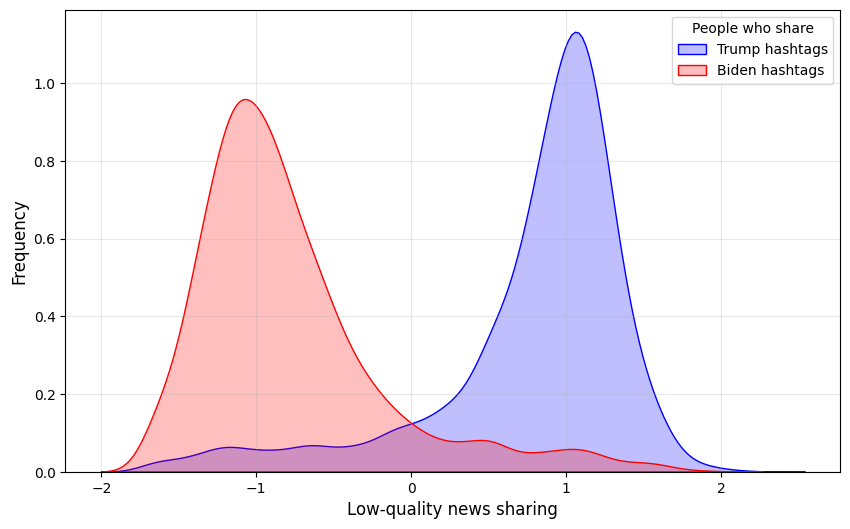

In [ ]:
group_by_hashtag_and_plot(mosleh_df_no_nan_fc, 'lowqual_pr2019_fc_z')

**Visualization of 2) Replace NaN values in lowqual_pr2019_fc with mean**

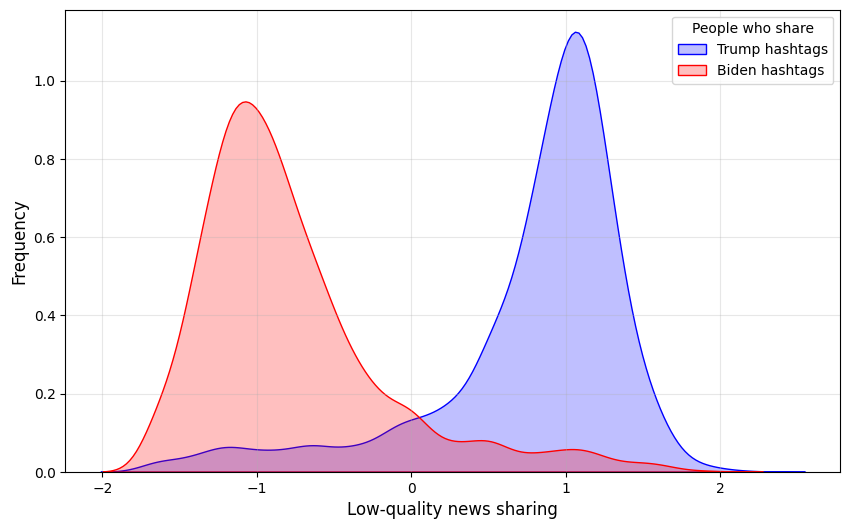

In [ ]:
group_by_hashtag_and_plot(mosleh_df_mean_fc, 'lowqual_pr2019_fc_z')

**Visualization of 3) Replace NaN values in lowqual_pr2019_fc with median**

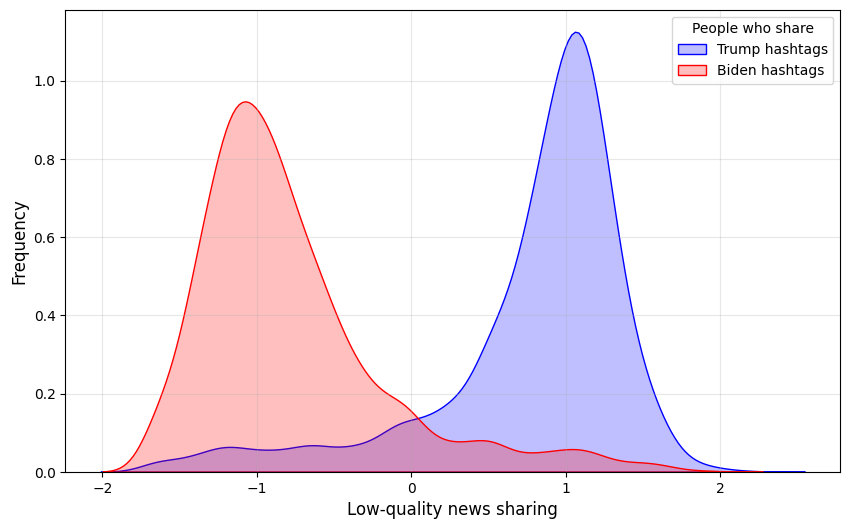

In [ ]:
group_by_hashtag_and_plot(mosleh_df_median_fc, 'lowqual_pr2019_fc_z')

From the three plots, we can see that there are no major differences between them. Therefore, we will choose the simplest approach: dropping the NaN values. This method results in a distribution that matches the one in the provided figure.

Having done, that, proceed to do the same with low-quality sharing as determined by crowdsourcing from 971 participants from the USA (column `lowqual_pr2019_crowd`). The distributions should look like the following figure.

fig_2.svg

Similarly to before, let's explore the `lowqual_pr2019_crowd` variable. We know it also has 65 missing values, but are these the same as those missing in `lowqual_pr2019_fc`? To check, we will use `.isna()` to identify the NaN values in both columns and then use `.all()` to verify if they are equal.

In [ ]:
na_values_match = (mosleh_df['lowqual_pr2019_crowd'].isna() == mosleh_df['lowqual_pr2019_fc'].isna()).all()
print("Do the columns have the same NaN values?", na_values_match)

Do the columns have the same NaN values? True


Since both columns share the same NaN values, we will handle them using the simplest approach: dropping the rows with NaN values. However, before doing so, let's call `.describe()` to review the summary statistics of the `lowqual_pr2019_crowd` variable.

In [ ]:
mosleh_df['lowqual_pr2019_crowd'].describe()

,lowqual_pr2019_crowd
count,8945.000000
mean,0.637918
std,0.072139
min,0.524729
25%,0.567706
50%,0.633167
75%,0.704621
max,0.823364


The statistics reveal that the `lowqual_pr2019_crowd` scores are more consistent, showing less variability and higher average values compared to the `lowqual_pr2019_fc` scores.

Now, let's drop the NaN values from the `lowqual_pr2019_crowd` column so we can proceed with the standardization of the x-axis.

In [ ]:
mosleh_df_no_nan_crowd = mosleh_df.dropna(subset=['lowqual_pr2019_crowd'])

The standardization will be exactly the same as before, using the `zscore` function from `scipy`.

In [ ]:
mosleh_df_no_nan_crowd = mosleh_df_no_nan_crowd.copy() # avoid working with a slice
mosleh_df_no_nan_crowd.loc[:, 'lowqual_pr2019_crowd_z'] = zscore(mosleh_df_no_nan_fc['lowqual_pr2019_crowd'])

We have our reusable function implemented, so we will call it by passing the filtered dataframe and the column name `lowqual_pr2019_crowd` as arguments.


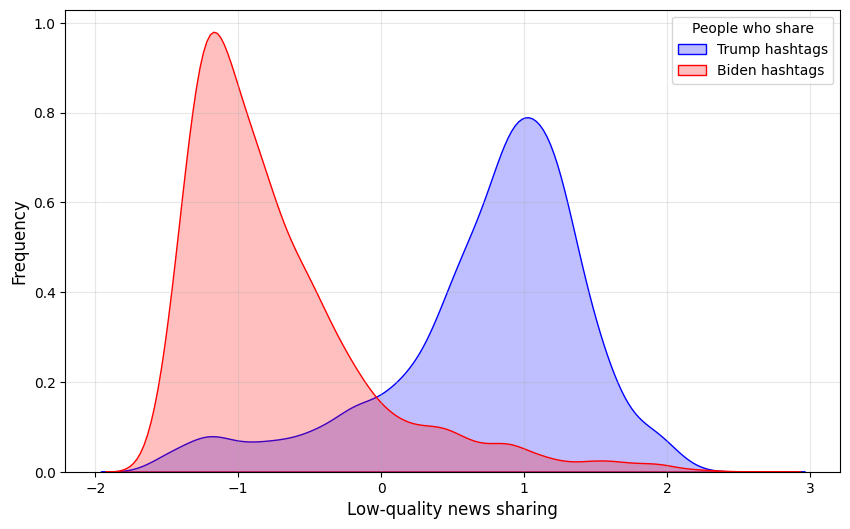

In [ ]:
group_by_hashtag_and_plot(mosleh_df_no_nan_crowd, 'lowqual_pr2019_crowd_z')

The distributions for `lowqual_pr2019_crowd` are identical to those in the provided figure, so we can proceed with our analysis.

## Low-quality News Sharing on Twitter

We will proceed to examine low-quality news sharing on Twitter on a more quantitave manner, using the t-test. In particular, we will use the t-test based on groups of users depending on their `politics_hashtag` and various assessments of low-quality news sharing. We will quantify the effect size of the t-test using Cohen's $d$ and Hedges' $g$.

Cohen's $d$ is defined as the difference between two means divided by a standard deviation for the data, i.e.:

$$ d = \frac{\bar{x}_{1} - \bar{x}_{2}}{s} $$

$s$, the pooled standard deviation for two independent samples is defined as:

$$ s=\sqrt{\frac{(n_{1}-1)s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{n_{1}+n_{2}-2}} $$

where $n_1$, $n_2$ is the size of each sample and the variance of $s_1$ is defined as:

$$ s_{1}^{2}=\frac{1}{n_{1}-1} \sum _{i=1}^{n_{1}}(x_{1,i}-{\bar {x}}_{1})^{2} $$

with the variance of $s_2$ defined similarly. The values of Cohen's $d$ can be interpreted as follows:

| Effect Size | $d$  |
|-------------|------|
| Very small  | 0.01 |
| Small	      | 0.20 |
| Medium	  | 0.50 |
| Large	      | 0.80 |
| Very large  | 1.20 |
| Huge        | 2.00 |

Hedges' $g$ corrects Cohen's $d$ for bias in small sample sizes and is defined as:

$$ \Bigg(1 - \frac{3}{4  (n_1 + n_2) - 9)}\Bigg)d $$

You will perform a t-test statistic and report Cohen's $d$ and Hedges' $g$ for the following, grouped by `politics_hashtag`.

* `lowqual_pr2019_fc` (sites rated by fact-checkers)
* `lowqual_afm` (sites rated by Ad Fontes media, <https://adfontesmedia.com/>)
* `lowqual_mbfc` (sites rated by Media Bias/Fact Check, <https://mediabiasfactcheck.com/>)
* `lowqual_lasser2019` (sites rated by Laser et al., https://doi.org/10.1093/pnasnexus/pgac186)
* `lowqual_pr2019_crowd` (sites rated by crowdsourcing 971 participants from the USA)
* `lowqual_pr2019_crowdrep` (sites rated by the republicans among the 971 participants of above)

To analyze these columns, we will follow a specific format and address each one separately. However, there are common steps for all of them. To better organize our code and avoid repetition, we will define functions for these tasks. The first step is to define a function that calculates `Cohen's d` for two groups, based on the definition provided earlier.

In [ ]:
def get_cohens_d(group1, group2):
    # calculate formula's components
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    # pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # cohen's d
    d = np.abs(mean1 - mean2) / pooled_std
    return d

Another measure we will use for each variable is `Hedges' g.` To calculate this, we will define a function that takes as arguments the Cohen's d of the variable and the sample sizes (n1 & n2) for the two groups, based on the definition given above.


In [ ]:
def get_hedges_g(cohens_d, n1, n2):
  correction = 1 - (3 / (4 * (n1 + n2) - 9))
  g = correction * cohens_d
  return g

Here is a note on what is a t-test and how we will perform it.

A **t-test** is a statistical test used to compare the means of two groups to determine if there is a significant difference between them.

In our analysis, we use the **t-test** to compare the average levels of **low-quality news sharing** between two groups of Twitter users:

1. **Trump supporters** (users who shared #Trump2020)
2. **Biden supporters** (users who shared #VoteBidenHarris2020)

We aim to determine whether the difference in **low-quality news sharing** between these two groups is statistically significant.

- **Null Hypothesis (H0):** The average low-quality news sharing is the same for Trump supporters and Biden supporters (no difference).
- **Alternative Hypothesis (H1):** The average low-quality news sharing differs between Trump supporters and Biden supporters.

The t-test provides us with:
- A **t-statistic**: This value indicates how much the averages of the two groups differ, adjusted for the spread (variability) within each group.
- A **p-value**: This indicates whether the difference in low-quality news sharing is statistically significant. If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that there is a meaningful difference between the groups.

We will perform the t-test using the `ttest_ind` function from the `scipy.stats` library.

Now is the right time to define the format for analyzing each variable. The steps for each analysis will be as follows:

1) Separate variable from the groups  
2) Handle NaN values  
3) Perform a t-test  
4) Quantify the effect size of the t-test using Cohen's d  
5) Quantify the effect size of the t-test using Hedges' g  

Since this process will be applied to many different variables, it would be extremely useful to create a customizable function that handles it.

This method will be named `perform_t_test` and will receive as arguments the two groups (by `politics_hashtag`) and the column on which we want to perform the test. It will return a dataframe of four statistics and the corresponding column name that we will then analyze. These statistics are:

- t-statistic
- p-value
- Cohen's d
- Hedge's g

Additionally, the output will include the mean values of each group for the specified column.

In [ ]:
def perform_t_test(group_1, group_2, column_name):
  # step 1 -> separate column name from the groups
  column_group_1 = group_1[column_name]
  column_group_2 = group_2[column_name]

  # step 2 -> handle nan values
  column_group_1 = column_group_1.dropna()
  column_group_2 = column_group_2.dropna()

  # step 3 -> perform a t-test
  t_stat, p_value = ttest_ind(column_group_1, column_group_2)

  # step 4 -> calculate cohens' d
  cohens_d = get_cohens_d(column_group_1, column_group_2)

  # step 5 -> calculate hedges' g
  len_group_1 = len(column_group_1)
  len_group_2 = len(column_group_2)

  hedges_g = get_hedges_g(cohens_d, len_group_1, len_group_2)

  return pd.DataFrame({
      'Variable': [column_name],
      't-statistic': [t_stat],
      'p-value': [p_value],
      'Cohen\'s d': [cohens_d],
      'Hedges\' g': [hedges_g],
      '#Trump2020 Group Mean': [column_group_1.mean()],
      '#VoteBidenHarris2020 Group Mean': [column_group_2.mean()]
  })

Before proceeding with the individual testing of the variables, we need to create our two groups. These groups will be derived by grouping `mosleh_df` based on the `politics_hashtag` column. This results in two groups: one where `politics_hashtag` has a value of 0, which we will name `biden_group`, and the other where the value is 1, which we will name `trump_group`.

In [ ]:
biden_group = mosleh_df[mosleh_df['politics_hashtag'] == 0]
trump_group = mosleh_df[mosleh_df['politics_hashtag'] == 1]

In [ ]:
print("Number of observations in biden_group:", biden_group.shape[0])
print("Number of observations in biden_group:", trump_group.shape[0])

Number of observations in biden_group: 4495
Number of observations in biden_group: 4505


The groups have been formed, and as we can see, they have nearly the same number of observations. Any specific issues with each variable (such as NaN values) are addressed inside the function we created earlier.

Now, we will apply the test to each dataframe and visualize the results.

**1) `lowqual_pr2019_fc`**

In [ ]:
lowqual_pr2019_fc_ttest = perform_t_test(trump_group, biden_group, 'lowqual_pr2019_fc')
lowqual_pr2019_fc_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_pr2019_fc,119.223343,0.0,2.521188,2.520977,0.653052,0.278144


**2) `lowqual_afm`**

In [ ]:
lowqual_afm_ttest = perform_t_test(trump_group, biden_group, 'lowqual_afm')
lowqual_afm_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_afm,102.677719,0.0,2.164878,2.164698,0.360563,0.190184


**3) `lowqual_mbfc`**

In [ ]:
lowqual_mbfc_ttest = perform_t_test(trump_group, biden_group, 'lowqual_mbfc')
lowqual_mbfc_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_mbfc,97.592231,0.0,2.05754,2.057369,0.498072,0.328687


**4) `lowqual_lasser2019`**

In [ ]:
lowqual_lasser2019_ttest = perform_t_test(trump_group, biden_group, 'lowqual_lasser2019')
lowqual_lasser2019_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_lasser2019,102.633746,0.0,2.163831,2.16365,0.641664,0.346232


**5) `lowqual_pr2019_crowd`**

In [ ]:
lowqual_pr_2019_crowd_ttest = perform_t_test(trump_group, biden_group, 'lowqual_pr2019_crowd')
lowqual_pr_2019_crowd_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_pr2019_crowd,102.464014,0.0,2.166782,2.166601,0.690696,0.584678


**6) `lowqual_pr2019_crowdrep`**

In [ ]:
lowqual_pr2019_crowdrep_ttest = perform_t_test(trump_group, biden_group, 'lowqual_pr2019_crowdrep')
lowqual_pr2019_crowdrep_ttest

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_pr2019_crowdrep,61.071485,0.0,1.291464,1.291356,0.72012,0.684697


Now that we have the statistics from all the variables, we will combine them into a single dataframe using the `.concat()` method in pandas, so we can analyze and make comments on the results.

In [ ]:
total_df = pd.concat([
    lowqual_pr2019_fc_ttest,
    lowqual_afm_ttest,
    lowqual_mbfc_ttest,
    lowqual_lasser2019_ttest,
    lowqual_pr_2019_crowd_ttest,
    lowqual_pr2019_crowdrep_ttest
], ignore_index=True)

total_df

,Variable,t-statistic,p-value,Cohen's d,Hedges' g,#Trump2020 Group Mean,#VoteBidenHarris2020 Group Mean
0,lowqual_pr2019_fc,119.223343,0.0,2.521188,2.520977,0.653052,0.278144
1,lowqual_afm,102.677719,0.0,2.164878,2.164698,0.360563,0.190184
2,lowqual_mbfc,97.592231,0.0,2.057540,2.057369,0.498072,0.328687
3,lowqual_lasser2019,102.633746,0.0,2.163831,2.163650,0.641664,0.346232
4,lowqual_pr2019_crowd,102.464014,0.0,2.166782,2.166601,0.690696,0.584678
5,lowqual_pr2019_crowdrep,61.071485,0.0,1.291464,1.291356,0.720120,0.684697


Here is a summary of key points extracted from the dataframe above:

- **T-Statistics**: Negative t-statistics indicate Trump supporters share more low-quality news than Biden supporters across all measures.  
- **P-Values**: All p-values are effectively zero, confirming highly significant differences.  
- **Effect Sizes**: Cohen's *d* and Hedges' *g* are huge or very large (e.g., *d* > 2), showing that the differences are both statistically and practically significant. Adjustments for small sample bias (Hedges' *g*) have minimal impact, reinforcing the reliability of the results.  
- **Group Means**: Trump supporters consistently exhibit higher mean values across all low-quality news measures, suggesting a stronger tendency to share such content compared to Biden supporters. For example, Trump supporters have an average of 0.65 for lowqual_pr2019_fc, compared to Biden's 0.28.

> These results suggest political orientation strongly influences low-quality news sharing, with Trump supporters engaging in this behavior more frequently than Biden supporters. The differences are both significant and substantial, emphasizing the role of political affiliation in online information behavior.




## Sharing Lower-quality News Sources and Conservative Ideology

To see if there is a correlation between lower-quality news sources and conservative ideology, you will perform pairwise correlations between, on the one hand:

 * `lowqual_pr2019_fc`
 * `lowqual_lasser2019`
 * `lowqual_mbfc`
 * `lowqual_afm`
 * `lowqual_pr2019_crowd`
 * `lowqual_pr2019_crowdrep`

and on the other hand:

 * `politics_followed` (political ideology estimated on the basis of Twitter accounts user followed)
 * `politics_hashtag`
 * `politics_sites1` (political ideology estimated on the basis of the news sites the users share, <https://doi.org/10.1126/science.aau2706>)
 * `politics_sites2` (political ideology estimated on the basis of the news sites ther users share, <https://doi.org/10.31219/osf.io/ch8gj>)

You should display the results in a heatmap like the following:

fig_3.svg

The first step is to separate the columns needed for the final correlation matrix from the initial dataframe. We can do this by creating two lists -one for each category- with the column names and then selecting them from `mosleh_df` into a new filtered dataframe.


In [ ]:
low_quality_columns = [
    'lowqual_pr2019_fc',
    'lowqual_lasser2019',
    'lowqual_mbfc',
    'lowqual_afm',
    'lowqual_pr2019_crowd',
    'lowqual_pr2019_crowdrep'
]

conservative_ideology_columns = [
    'politics_followed',
    'politics_hashtag',
    'politics_sites1',
    'politics_sites2'
]

mosleh_df_lowqual_conideo = mosleh_df[low_quality_columns + conservative_ideology_columns]

Next, we will call the `.corr()` function, which will calculate pairwise correlations. This means each column will be compared to every other column, and the results will be displayed in the corresponding cells of the correlation matrix.

In [ ]:
lowqual_consideo_corr = mosleh_df_lowqual_conideo.corr()
lowqual_consideo_corr

,lowqual_pr2019_fc,lowqual_lasser2019,lowqual_mbfc,lowqual_afm,lowqual_pr2019_crowd,lowqual_pr2019_crowdrep,politics_followed,politics_hashtag,politics_sites1,politics_sites2
lowqual_pr2019_fc,1.000000,0.859959,0.755974,0.881299,0.964348,0.789817,0.809501,0.783463,0.876237,0.854197
lowqual_lasser2019,0.859959,1.000000,0.803178,0.900902,0.840018,0.671775,0.777250,0.734398,0.835576,0.851794
lowqual_mbfc,0.755974,0.803178,1.000000,0.784055,0.713212,0.547665,0.748146,0.717101,0.774779,0.774266
lowqual_afm,0.881299,0.900902,0.784055,1.000000,0.854943,0.695761,0.768887,0.734562,0.845285,0.833632
lowqual_pr2019_crowd,0.964348,0.840018,0.713212,0.854943,1.000000,0.886781,0.754001,0.734856,0.811904,0.784861
lowqual_pr2019_crowdrep,0.789817,0.671775,0.547665,0.695761,0.886781,1.000000,0.540993,0.542505,0.576336,0.552613
politics_followed,0.809501,0.777250,0.748146,0.768887,0.754001,0.540993,1.000000,0.859692,0.878668,0.860106
politics_hashtag,0.783463,0.734398,0.717101,0.734562,0.734856,0.542505,0.859692,1.000000,0.830136,0.812912
politics_sites1,0.876237,0.835576,0.774779,0.845285,0.811904,0.576336,0.878668,0.830136,1.000000,0.933718
politics_sites2,0.854197,0.851794,0.774266,0.833632,0.784861,0.552613,0.860106,0.812912,0.933718,1.000000


However, this correlation matrix contains more columns and rows than we need. To match the provided correlation matrix, we will filter both the index and columns. Specifically, we will remove the `conservative_ideology_columns` from the index and the `low_quality_columns` from the columns.

In [ ]:
lowqual_consideo_corr = lowqual_consideo_corr.drop(index=conservative_ideology_columns) # drop conservative ideology columns from the index of the correlation matrix
lowqual_consideo_corr = lowqual_consideo_corr.drop(columns=low_quality_columns) # drop low quality columns from the columns of the correlation matrix
lowqual_consideo_corr

,politics_followed,politics_hashtag,politics_sites1,politics_sites2
lowqual_pr2019_fc,0.809501,0.783463,0.876237,0.854197
lowqual_lasser2019,0.777250,0.734398,0.835576,0.851794
lowqual_mbfc,0.748146,0.717101,0.774779,0.774266
lowqual_afm,0.768887,0.734562,0.845285,0.833632
lowqual_pr2019_crowd,0.754001,0.734856,0.811904,0.784861
lowqual_pr2019_crowdrep,0.540993,0.542505,0.576336,0.552613


The last step is to visualize the correlation matrix in a clear and visually appealing way, using similar color scheme and format as the provided matrix. We will accomplish this using the `.heatmap()` method from the seaborn library, along with matplotlib for the plot.

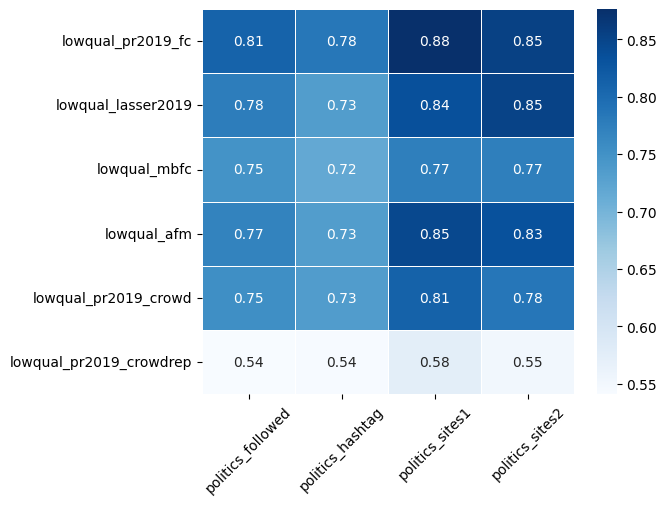

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(lowqual_consideo_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

The results of the correlation matrix highlight a robust association between low-quality news sharing and political ideology, particularly when political ideology is measured through news site sharing (`politics_sites1` and `politics_sites2`). However, the last row, representing `lowqual_pr2019_crowdrep`, shows no strong correlation, suggesting that this measure may be less relevant in this context.

## News Sharing Can Help Explain Suspension, Using Single Predictors

You will use the following predictors to predict whether a user was suspended or not:

  * `politics_hashtag`
  * `politics_sites1`
  * `politics_sites2`
  * `politics_followed`
  * `lowqual_afm`
  * `lowqual_mbfc`
  * `lowqual_lasser2019`
  * `lowqual_pr2019_fc`
  * `lowqual_pr2019_crowd`

The predictions will be with a probit model. The probit model is an alternative to logit, but while the latter uses the logit as the *link function*, the probit model uses the inverse of the cumulative distribution function (CDF) of the standard normal distribution (denoted as $\Phi^{-1}$) as the link function. Mathematically:

$$ \Phi^{-1}(P(Y = 1 | X)) = X\beta $$

where $P(Y = 1  | X)$ is the probability of the event occurring, $X$ represents the independent variables, and $\beta$ is the vector of coefficients.

The predictions will be evaluated with the AUC of the ROC curve. To get confidence intervals, repeat each prediction 100 times by using the boostrap method.

Print the AUC and the confidence intervals in a table. Then use them to plot all your evaluations and the confidence intervals in a barchart like the following:


fig_4.svg

The first step is to create a structure that allows us to easily access our predictors. A convenient way to achieve this is by creating a dictionary where the keys are the column names of the predictors, and the values are the labels we will use in the plots for the corresponding predictors.

In [ ]:
single_predictors = {
    'politics_hashtag': 'Hashtag shared',
    'politics_sites1': 'News sites shared 1',
    'politics_sites2': 'News sites shared 2',
    'politics_followed': 'Accounts followed',
    'lowqual_afm': 'AFM ratings',
    'lowqual_mbfc': 'MBFC ratings',
    'lowqual_lasser2019': 'Lasser ratings',
    'lowqual_pr2019_fc': 'Fact-checker ratings',
    'lowqual_pr2019_crowd': 'Layperson ratings'
}

For the predictions, we will use a **probit model**, implemented in the `statsmodels.api` package using the `Probit` class. The `Probit` function requires the following key arguments:

- **`endog` (The dependent variable):**  
  This is the binary variable we want to predict. In our case, it is `suspended`, which indicates whether a user was suspended (`1`) or not (`0`).

- **`exog` (The independent variables):**  
  These are the predictors we use for the analysis. Since we are focusing on single predictors, `exog` will be one variable at a time, such as `politics_hashtag`, `lowqual_afm`, or others.

To train the Probit model, we first need to initialize the model instance, and then fit it with our data. Since we will be using the Probit model multiple times with different datasets, we will create a function called `probit_model` to handle this process.

In [ ]:
def probit_model(X, y):
    model = sm.Probit(y, X) # initialize probit model instance
    result = model.fit(disp=False) # train the probit model (output displaying set to false)
    return result

We have 9 individual predictors, and for each of these predictors, we will apply a bootstrap method, which involves repeating the entire modeling process multiple times using different random samples of the data. In our case, the number of iterations will be set to 100. This allows us to calculate confidence intervals by examining the percentiles of the bootstrapped results.

To evaluate each predictor, we will use the **Area Under the Curve (AUC)** from the ROC curve. The evaluation metric for each predictor, after running the bootstrap process 100 times, will be the mean AUC along with the corresponding confidence intervals.

Before defining our custom bootstrap method, we should outline the steps of the modeling process. The steps are as follows:

1. **Prepare the data**:
   - **X**: The predictor column (independent variable) for the current analysis.
   - **y**: The target variable, which is the `suspended` column (dependent variable).
   
2. **Handle NaN values** in the predictor column.

3. **Create a bootstrap sample** by resampling with replacement

4. **Add a constant** to the independent variable column.

5. **Train the model** using the current predictor.

6. **Generate predictions** based on the trained model.

7. **Evaluate the model's performance** using the AUC from the ROC curve.

The process will be repeated for each predictor, and for each predictor, it will be performed as many times as the number of iterations specified in the bootstrap method.

For the evaluation, we will define a function called `bootstrap_auc`, which will receive the following arguments:

- **df**: The entire dataframe
- **X**: An independent column (the predictor)
- **y**: A dependent column (the target)
- **num_iter**: The number of iterations (with a default value of 100)
- **conf_interv**: The confidence interval level (with a default value of 95%)

The function will perform the modeling process outlined earlier, and the final output will be the mean AUC for each predictor, along with its corresponding confidence intervals.

In [ ]:
def bootstrap_auc(df, X, y, num_iter=100, conf_interv=95):
    # step 1: prepare data
    X = df[X]
    y = df[y]

    # step 2: handle nan values (drop nan values)
    X = X.dropna()
    y = y[X.index] # ensure that the same rows are dropped from y

    aucs = []  # list to store auc of every iteration

    for i in range(num_iter):
        # step 3: create a bootstrap sample
        X_resampled, y_resampled = resample(X, y, n_samples=len(X), random_state=i)

        # step 4: add constant to X
        X_resampled = sm.add_constant(X_resampled)

        # step 5: train the probit model
        result = probit_model(X_resampled, y_resampled)

        # step 6: generate predictions
        y_pred = result.predict(X_resampled)

        # step 7: evaluate the model's performance with auc
        auc = roc_auc_score(y_resampled, y_pred)
        aucs.append(auc)  # append the auc score of this iteration

    # calculate the mean auc
    mean_auc = np.mean(aucs)
    # calculate the confidence intervals
    lower_bound = np.percentile(aucs, (100 - conf_interv) / 2)
    upper_bound = np.percentile(aucs, 100 - (100 - conf_interv) / 2)

    return mean_auc, (lower_bound, upper_bound)

Some parts of the function that need explanation are the following two:

1) **Resampling method**: The `resample` function generates bootstrap samples by randomly selecting data points with replacement from the original dataset. This allows some data points to be selected multiple times, while others may be omitted.

2) **Confidence intervals calculation**: The confidence intervals are calculated using percentiles. Specifically, we compute using `np.percentile` the 2.5th and 97.5th percentiles of the AUC scores from the bootstrap iterations. This gives a range within which we expect the true AUC to fall with 95% confidence.


This function will be called in a loop that iterates through all of our predictors. The results will be saved in a list, where each element contains a dictionary for each predictor, including its label, mean AUC, and confidence intervals. Additionally, this dictionary will include a "Class" key, which specifies the class (Political orientation or Low-quality news sharing) to which the variable belongs.


In [ ]:
results = []

for predictor, predictor_label in single_predictors.items():
    print(f"Evaluating {predictor}...")

    mean_auc, confidence_intervals = bootstrap_auc(mosleh_df, X=predictor, y='suspended', num_iter=100, conf_interv=95)

    print(f"Mean AUC for {predictor}: {mean_auc:.4f}")
    print(f"Confidence Interval (95%): {confidence_intervals}")

    results.append({
        'Predictor': predictor_label,
        'Mean AUC': mean_auc,
        'CI Lower Bound': confidence_intervals[0],
        'CI Upper Bound': confidence_intervals[1],
        'Class': 'Political orientation' if 'politics' in predictor else 'Low-quality news sharing'
    })

    print("-" * 65)

results_df = pd.DataFrame(results)

Evaluating politics_hashtag...
Mean AUC for politics_hashtag: 0.6792
Confidence Interval (95%): (0.668208231051666, 0.6919015098041634)
-----------------------------------------------------------------
Evaluating politics_sites1...
Mean AUC for politics_sites1: 0.6999
Confidence Interval (95%): (0.6885489081525001, 0.7148798253720707)
-----------------------------------------------------------------
Evaluating politics_sites2...
Mean AUC for politics_sites2: 0.7045
Confidence Interval (95%): (0.6922784045728464, 0.717257925825892)
-----------------------------------------------------------------
Evaluating politics_followed...
Mean AUC for politics_followed: 0.7146
Confidence Interval (95%): (0.6978923134683923, 0.729794340263111)
-----------------------------------------------------------------
Evaluating lowqual_afm...
Mean AUC for lowqual_afm: 0.7158
Confidence Interval (95%): (0.7002483154910936, 0.7314442605712449)
-----------------------------------------------------------------


Once we have obtained our results in a dataframe, it is helpful to visualize them. Therefore, we will plot the results in a **bar plot**, where the predictor labels are shown on the x-axis and the mean AUC is displayed on the vertical axis. Additionally, the confidence intervals are represented with error bars. These error bars are computed using the lower and upper bounds of the confidence intervals, and they indicate the range within which the true mean AUC is expected to lie. The error bars are plotted using `plt.errorbar()`, which requires the data for the predictors, mean AUC values, and the lower and upper bounds of the confidence intervals as arguments.

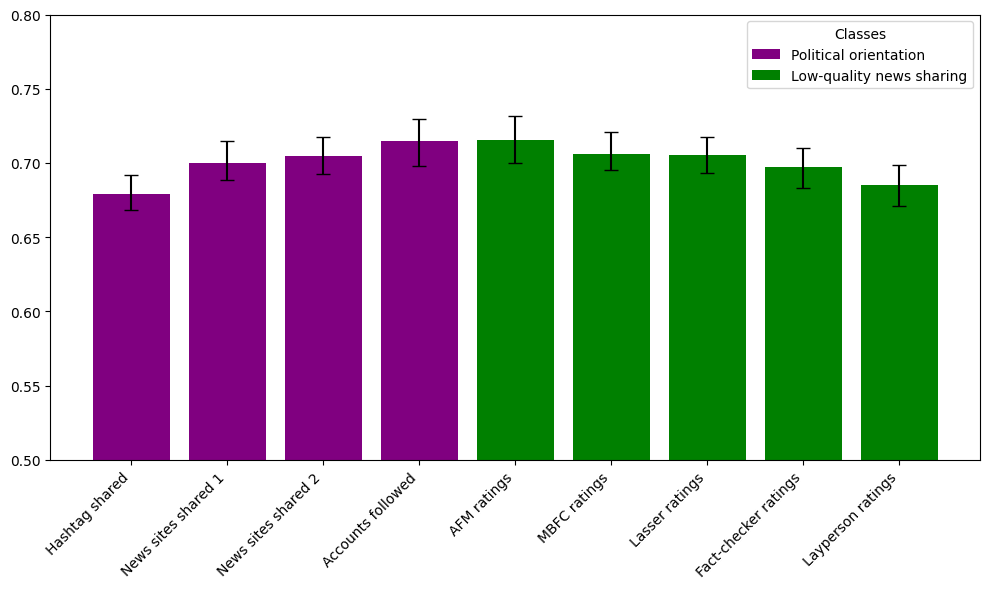

In [ ]:
plt.figure(figsize=(10, 6))

# map political orientation columns to purple and low quality news sharing to green
colors = results_df['Class'].map({'Political orientation': 'purple', 'Low-quality news sharing': 'green'}).tolist()

# create barplot using the colors assigned for each class
bars = plt.bar(results_df['Predictor'], results_df['Mean AUC'], color=colors)

# add error bars to the plot (from the lower bound to the upper bound of the confidence interval)
plt.errorbar(results_df['Predictor'], results_df['Mean AUC'],
             yerr=[np.array(results_df['Mean AUC']) - np.array(results_df['CI Lower Bound']),
                   np.array(results_df['CI Upper Bound']) - np.array(results_df['Mean AUC'])],
             fmt='none', color='black', capsize=5)

# rotate labels to avoide text overlap
plt.xticks(rotation=45, ha='right')

# add a legend in the top right corner with the correct colors
legend_elements = [
    Patch(facecolor='purple', label='Political orientation'),
    Patch(facecolor='green', label='Low-quality news sharing')
]
plt.legend(handles=legend_elements, loc='upper right', title='Classes')

# focus only on this range of auc values
plt.ylim(0.50, 0.80)

plt.tight_layout()
plt.show()

As we can see, our plot closely matches the one provided, allowing us to proceed with the analysis.

## News Sharing Can Help Explain Suspension, Using Multiple Predictors

You will also use multiple regression models to predict and explain suspension.

Start by filing in missing values in your data by using the column mean. Then log transform, base 10, the variables that are related to Tweeter metrics, i.e.:

* `repeated_tweet_count` to `log_repeated_tweet_count`
* `freq_pr_1h` (maximum frequency of primary tweets in an hour) to `log_freq_pr_1h`
* `num_followers` to `log_num_followers`
* `num_friends` to `log_num_friends`

Introduce an additional variable, `log_fol`, which should the be base 10 logarithm of `num_friends` over `num_followers` ratio. To prevent out of domain errors, add 1 to each variable when using it in the transforms.

The first step is to handle any missing values by filling all the NaN entries in each column with the mean value of that specific column. This can be achieved using the `.fillna()` method for each column.

In [ ]:
mosleh_df = mosleh_df.fillna(mosleh_df.mean())

Next, we need to identify the variables in our dataset that are related to Twitter metrics. Along with the previously mentioned predictors, these include:  
- `repeated_tweet_count`  
- `freq_pr_1h`  
- `num_followers`  
- `num_friends`  
- `tweets_in_2wk`  
- `bad_domain_count`  

We will transform the values of these columns by applying the base-10 logarithm to normalize their distributions. This can be done using the `np.log10()` function from the NumPy library. We will also add 1 to the values before applying the transformations to avoid errors caused by taking the logarithm of zero. This is a common practice to handle cases where the variable might have zero values.


In [ ]:
mosleh_df['log_repeated_tweet_count'] = np.log10(mosleh_df['repeated_tweet_count'] + 1)
mosleh_df['log_freq_pr_1h'] = np.log10(mosleh_df['freq_pr_1h'] + 1)
mosleh_df['log_num_followers'] = np.log10(mosleh_df['num_followers'] + 1)
mosleh_df['log_num_friends'] = np.log10(mosleh_df['num_friends'] + 1)
mosleh_df['log_tweets_in_2wk'] = np.log10(mosleh_df['tweets_in_2wk'] + 1)
mosleh_df['log_bad_domain_count'] = np.log10(mosleh_df['bad_domain_count'] + 1)

Finally, we will create a new variable named `log_fol`, calculated as the base-10 logarithm of the ratio of `num_friends` to `num_followers`.

In [ ]:
mosleh_df['log_fol'] = np.log10((mosleh_df['num_friends'] + 1) / (mosleh_df['num_followers'] + 1))

To reduce the effect of outliers, you will [winsorize](https://en.wikipedia.org/wiki/Winsorizing) the data. Winzorize from both sides at the top 1% the following variables:

* `valence_neg`
* `valence_neu`
* `valence_pos`
* `barbera_std`
* `politics_sites1_std`
* `politics_sites2_ideo_std`

The `valence_*`, variables were calculated using VADER (<https://doi.org/10.1609/icwsm.v8i1.14550>). The `barbera_std` variable was calculated based on the work of Barbera et al. (<https://doi.org/10.1177/0956797615594620>).

**Winsorization** is a technique used to limit extreme values in statistical data, reducing the influence of outliers. Let's create a list of all the columns that we want to apply Winsorization to.

In [ ]:
winsorize_columns = [
    'valence_neg',
    'valence_neu',
    'valence_pos',
    'barbera_std',
    'politics_sites1_std',
    'politics_sites2_ideo_std'
]

To apply Winsorization, we will use the `winsorize` function from `scipy`. Before proceeding, however, let's first obtain a statistical summary of the selected columns using the `describe` function. This will help us understand the data distribution and determine appropriate limits for Winsorization.

In [ ]:
mosleh_df[winsorize_columns].describe()

,valence_neg,valence_neu,valence_pos,barbera_std,politics_sites1_std,politics_sites2_ideo_std
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.071231,0.835800,0.092969,0.631783,66.785000,0.273516
std,0.020305,0.036613,0.028088,0.291618,95.101625,0.070535
min,0.000000,0.565760,0.000000,0.000489,4.000000,0.000000
25%,0.060228,0.816792,0.077355,0.372799,20.000000,0.232173
50%,0.071231,0.835800,0.090432,0.631783,43.000000,0.275003
75%,0.081970,0.852164,0.106286,0.858035,80.000000,0.322558
max,0.241860,0.999075,0.367570,1.880192,2450.000000,0.685976


The variables generally show consistent or moderate values, with a few outliers, particularly in `politics_sites1_std` and `barbera_std`. These metrics reflect sentiment and extremity in political contexts. Some variables, such as `valence_neu` and `politics_sites2_ideo_std`, display less variation.

Let's now apply the `winsorize` function to each column that we want to modify, passing the columns and the limits for capping. We will cap 1% from each side by using the `limits` argument.

In [ ]:
for col in winsorize_columns:
    mosleh_df[col] = winsorize(mosleh_df[col], limits=(0.01, 0.01)) # capping at 1% from both ends

We will now recall the `describe` function on the same columns to highlight any differences after the winsorization process.

In [ ]:
mosleh_df[winsorize_columns].describe()

,valence_neg,valence_neu,valence_pos,barbera_std,politics_sites1_std,politics_sites2_ideo_std
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.071108,0.835920,0.092763,0.630942,63.961778,0.273531
std,0.019413,0.035437,0.026785,0.287247,70.982196,0.068959
min,0.017625,0.743420,0.019780,0.131269,5.000000,0.079671
25%,0.060228,0.816792,0.077355,0.372799,20.000000,0.232173
50%,0.071231,0.835800,0.090432,0.631783,43.000000,0.275003
75%,0.081970,0.852164,0.106286,0.858035,80.000000,0.322558
max,0.128965,0.957380,0.177375,1.265677,450.000000,0.425925


It is clear that some of the very large values, which were likely outliers, such as (2450.00 in `politics_sites1_std`) have now been capped, improving the quality and stability of our dataset.


You will derive and use a single PCA component, `pc1_misinfo`, for low quality news sharing, that is, the variables:

* `lowqual_pr2019_fc`
* `lowqual_afm`
* `lowqual_lasser2019`
* `lowqual_mbfc`

Show the explained variance ratio. Then project the low quality news sharing dimensions to this new dimension.

Let's first clarify what PCA is and why we are using it. **Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms a set of potentially correlated variables into a smaller set of uncorrelated variables called principal components. These components capture the maximum variance in the data, with the first principal component explaining the most variance, followed by the second, and so on.


The first step, once again, is to organize the columns we are going to work with into a list.

In [ ]:
lowqual_columns = [
    'lowqual_pr2019_fc',
    'lowqual_afm',
    'lowqual_lasser2019',
    'lowqual_mbfc'
]

For the PCA, it is essential that our data does not contain any NaN values, which we have already addressed by filling them with the mean of each column. Additionally, it is important for the data to have comparable scales. To achieve this, we will scale our data using the `StandardScaler()` from `sklearn`.

To apply the transformation, we use the `.fit_transform` method of the `StandardScaler` instance, passing the columns we want to transform as arguments.

In [ ]:
scaler_lowqual = StandardScaler()
low_quality_data_scaled = scaler_lowqual.fit_transform(mosleh_df[lowqual_columns])

Now we can apply PCA using the `PCA` class from `sklearn`. We create an instance of `PCA`, setting `n_components=1` because we want to derive a single principal component from the four columns. Then, we call the `fit_transform` method on the scaled data to compute and extract our component.

In [ ]:
pca_lowqual = PCA(n_components=1)
pca_result_lowqual = pca_lowqual.fit_transform(low_quality_data_scaled)

We can extract the explained variance ratio using the `.explained_variance_ratio_` attribute of the PCA object. This metric indicates how much variability (or information) in the original dataset is captured by the first principal component in our PCA analysis.

In [ ]:
explained_variance_ratio_lowqual = pca_lowqual.explained_variance_ratio_[0] # index 0 for the first principal component
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio_lowqual:.4f}")

Explained Variance Ratio for PC1: 0.8726


The **explained variance ratio** for PC1 is **0.8726**, meaning the first principal component captures about 87.26% of the variability in the low-quality news sharing variables. This shows that most of the information in these variables can be summarized effectively in a single dimension.


The final step is to add this new variable to our dataset with the name `pc1_misinfo`.

In [ ]:
mosleh_df['pc1_misinfo'] = pca_result_lowqual[:, 0] # index 0 for the first principal component

We will work in the same way for the political orientation, getting a single PCA component, `pc1_politics`, for the variables:

* `politics_hashtag`
* `politics_followed`
* `politics_sites1`
* `politics_sites2`

Show the explained variance ratio and project the political orientation dimensions to this new dimension.

Introduce a new variable, `extremity`, which is the absolute value of the PCA component you got.

We follow similar steps to create the `pc1_politics` column, starting by defining a list with the variables we will use.

In [ ]:
politics_columns = [
    'politics_hashtag',
    'politics_followed',
    'politics_sites1',
    'politics_sites2'
]

Next, we will scale the data to ensure that PCA works more efficiently.

In [ ]:
scaler_politics = StandardScaler()
politics_data_scaled = scaler_politics.fit_transform(mosleh_df[politics_columns])

Then, we will apply PCA again, setting `n_components=1` to extract a single principal component.

In [ ]:
pca_politics = PCA(n_components=1)
pca_result_politics = pca_politics.fit_transform(politics_data_scaled)

Let's now check the explained variance ratio to see if our single component effectively captures the information from the 4 political columns.

In [ ]:
explained_variance_ratio_politics = pca_politics.explained_variance_ratio_[0] # index 0 for the first principal component
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio_politics:.4f}")

Explained Variance Ratio for PC1: 0.8795


The ratio is high enough once again, so we will add the single component to our dataset with the name `pc1_politics`.

In [ ]:
mosleh_df['pc1_politics'] = pca_result_politics[:, 0] # index 0 for the first principal component

Before proceeding, we will introduce one more variable, which will be the absolute value of the PCA component we just added. This variable will be named `extremity`. We can use the absolute values from NumPy by applying the `.abs()` method.

In [ ]:
mosleh_df['extremity'] = np.abs(mosleh_df['pc1_politics'])

Since we may need to repeat the same process multiple times, possibly with different numbers of components, we will now define a function that performs these steps more efficiently and with greater flexibility. While we could have created this function earlier, we followed the steps as they are to ensure a better understanding and explanation of how the process works.

In [ ]:
def get_pca_components(df, columns, num_components=1):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[columns])

    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(data_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_

    return pca_result, explained_variance_ratio

As we can see, the function performs exactly the same tasks: it first scales the columns passed as arguments, then applies PCA, and finally extracts the explained variance component. At the end, it returns the PCA component(s) and the corresponding measure, allowing us to handle them as needed.

Also do the same for `log_followers`, `log_friends`, `log_fol`, producing `pc1_fol`.

We need to repeat the process, so the first step of organizing the required columns remains the same.

In [ ]:
followers_columns = [
    'log_num_followers',
    'log_num_friends',
    'log_fol'
]

Now that we have our function defined, we can simply call it by passing our dataset and the columns we want to apply PCA on, and then retrieve the returned values.

In [ ]:
pca_result_followers, explained_variance_ratio_followers = get_pca_components(mosleh_df, followers_columns)

Now that we have the returned values, we can handle them as needed. Let's first examine the explained variance ratio.

In [ ]:
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio_followers[0]:.4f}")

Explained Variance Ratio for PC1: 0.7046


The value may not be as high as before, but it is still acceptable. Therefore, we will proceed by adding this single component to our dataset under the name `pc1_fol`.

In [ ]:
mosleh_df['pc1_fol'] = pca_result_followers[:, 0] # index 0 for the first principal component

Regarding the harmful language variables, perform PCA for *three* components, `pc1_harmful_language`, `pc2_harmful_language`, `pc3_harmful_language`, on the winsorized data of:

* `rewire_abuse`
* `rewire_hate`
* `rewire_profanity`
* `rewire_violent`
* `rewire_sexually_explicit`
* `jigsaw_toxicity`
* `jigsaw_severe_toxicity`
* `jigsaw_idenity_attack`
* `jigsaw_insult`
* `jigsaw_profanity`
* `jigsaw_threat`

Why use three components instead of one in this case? Try to interpret each of the principal components.

Now the task seems more complex, as we want to use three components instead of just one. However, it's essentially the same process; we simply need to change the `n_components` argument in the PCA instance. Our customizable function already supports this through the `num_components` argument. Before calling the function, let's once again organize the relevant columns into a list.

In [ ]:
harmful_language_columns = [
    'rewire_abuse',
    'rewire_hate',
    'rewire_profanity',
    'rewire_violent',
    'rewire_sexually_explicit',
    'jigsaw_toxicity',
    'jigsaw_severe_toxicity',
    'jigsaw_idenity_attack',
    'jigsaw_insult',
    'jigsaw_profanity',
    'jigsaw_threat'
]

Now there is an additional step before applying PCA. We need to winsorize our data first to handle any outliers, and then we can proceed with PCA. This ensures that the extreme values are capped, making the PCA process more stable and effective.


In [ ]:
harmful_language_df = mosleh_df[harmful_language_columns]
harmful_language_df = harmful_language_df.apply(lambda x: winsorize(x, limits=(0.01, 0.01)))

We achieved this by first separating the columns of interest from the initial dataframe, and then applying the `winsorize` method to them, just as we did earlier. We used the `limits` argument (0.01, 0.01) to cap both ends by 1%.

Now, we will pass the `harmful_language_df` as an argument to the `get_pca_components` method and set `num_components` to 3.

In [ ]:
pca_result_harmful_language, explained_variance_ratio_harmful_language = get_pca_components(harmful_language_df, harmful_language_columns, num_components=3)

Now that we have obtained three principal components, the `explained_variance_ratio_harmful_language` will be a list of three values. Each value indicates how much of the information from the original variables is captured by the corresponding principal component. Let's explore these values.

In [ ]:
for i, ratio in enumerate(explained_variance_ratio_harmful_language, start=1):
    print(f"Explained Variance Ratio for PC{i}: {ratio:.4f}")

Explained Variance Ratio for PC1: 0.5614
Explained Variance Ratio for PC2: 0.1187
Explained Variance Ratio for PC3: 0.1072


The explained variance ratios show how much variability each principal component captures:

- **PC1 (56.14%)**: Captures most of the variance, representing the main dimension of harmful language.
- **PC2 (11.87%)**: Explains a smaller but notable portion, reflecting a secondary pattern.
- **PC3 (10.72%)**: Adds another unique dimension with less significance.

Together, these three components explain 78.73% of the total variance, effectively summarizing the key patterns in the data.

A single component is not enough because it only captures the main pattern (56.14%) of the variance, missing important secondary and tertiary patterns (11.87% and 10.72%). These extra components show other important aspects of harmful language that one dimension cannot fully explain, making them essential for a better analysis.

The PCA result also consists of three components, one for each part of the explained variance ratio. We will add these components to our original dataframe as three new variables: `pc1_harmful_language`, `pc2_harmful_language`, and `pc3_harmful_language`, corresponding to each component.

In [ ]:
mosleh_df['pc1_harmful_language'] = pca_result_harmful_language[:, 0] # index 0 for the first principal component
mosleh_df['pc2_harmful_language'] = pca_result_harmful_language[:, 1] # index 1 for the second principal component
mosleh_df['pc3_harmful_language'] = pca_result_harmful_language[:, 2] # index 2 for the third principal component

Return to producing a single PCA component, `pc1_valence`, for the winsorized data of the valence variables:

* `valence_neg`
* `valence_neu`
* `valence_pos`

We are back to single PCA components. The variables we want to apply PCA on are already winsorized from earlier, so we proceed by creating a list of the column names.

In [ ]:
valence_columns = [
    'valence_neg',
    'valence_neu',
    'valence_pos'
]

Once again, we simply call our function, passing the `mosleh_df` and the column names as arguments. The `num_components` parameter remains at its default value of 1.

In [ ]:
pca_result_valence, explained_variance_ratio_valence = get_pca_components(mosleh_df, valence_columns)

Now, let's check the value of the explained variance ratio.

In [ ]:
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio_valence[0]:.4f}")

Explained Variance Ratio for PC1: 0.7079


The result is again acceptable. Therefore, we proceed to create a new variable in the initial dataset with the name `pc1_valence` to store the first principal component.


In [ ]:
mosleh_df['pc1_valence'] = pca_result_valence[:, 0] # index 0 for the first principal component

Before proceeding, normalize the independent variables by taking their z-scores. You will use the following z-scored independent variables (winsorized as stated above):

* `pc1_politics`
* `pc1_misinfo`
* `pc1_fol`,
* `pc1_harmful_language`
* `pc2_harmful_language`
* `pc3_harmful_language`
* `pc1_valence`
* `tweets_in_2wk`
* `botsentinel_score`
* `extremity`
* `moral_outrage`
* `liwc_political`
* `log_freq_pr_1h`
* `log_repeated_tweet_count`
* `barbera_std`
* `politics_sites1_std`
* `politics_sites2_ideo_std`

The data preparation and preprocessing phase is nearing completion. Now, it is time to identify and separate the columns that will be used for predictions in the multiple regression models. The variables that will be used are those mentioned earlier and we will create a new dataframe containing only these.


In [ ]:
multiple_regression_columns = [
    'pc1_politics',
    'pc1_misinfo',
    'pc1_fol',
    'pc1_harmful_language',
    'pc2_harmful_language',
    'pc3_harmful_language',
    'pc1_valence',
    "tweets_in_2wk",
    "botsentinel_score",
    "extremity",
    "moral_outrage",
    "liwc_political",
    "log_freq_pr_1h",
    "log_repeated_tweet_count",
    "barbera_std",
    "politics_sites1_std",
    "politics_sites2_ideo_std"
]

multiple_regression_df = mosleh_df[multiple_regression_columns]

Let's review the data we will use for the rest of our analysis by displaying a random sample of 5 rows from the dataset.

In [ ]:
multiple_regression_df.sample(5)

,pc1_politics,pc1_misinfo,pc1_fol,pc1_harmful_language,pc2_harmful_language,pc3_harmful_language,pc1_valence,tweets_in_2wk,botsentinel_score,extremity,moral_outrage,liwc_political,log_freq_pr_1h,log_repeated_tweet_count,barbera_std,politics_sites1_std,politics_sites2_ideo_std
2559,-1.921544,-1.607655,1.096088,1.451546,-0.251939,-0.099545,0.474380,2392,17.0,1.921544,0.233147,0.355,1.113943,1.342423,0.444420,122,0.261742
7299,-0.255556,0.284337,-1.513266,-2.282634,-1.271405,-0.734540,-0.183372,192,16.0,0.255556,0.163265,0.195,1.397940,3.496930,0.236998,24,0.160480
7084,2.028119,1.728157,0.394719,-0.467389,0.605210,0.109047,0.124155,3211,57.0,2.028119,0.243148,0.435,1.204120,0.301030,1.059076,53,0.348540
3386,-2.557748,-2.053445,-1.425283,-3.186925,-0.217706,-0.019307,0.481694,254,18.0,2.557748,0.198790,0.560,0.903090,2.103804,0.338909,27,0.231818
1639,-2.361066,-1.612553,0.847984,-2.354309,-0.147944,0.120489,-1.486833,672,17.0,2.361066,0.166593,0.315,1.380211,2.498311,0.236410,19,0.246449


Before starting with the predictions, we will winsorize the data, similarly to before, and then normalize them by calculating their z-scores. This can be done easily using the `winsorize` and `zscore` methods from the `scipy` library, which we used earlier.


In [ ]:
already_winsorized_columns = [
    "barbera_std",
    "politics_sites1_std",
    "politics_sites2_ideo_std"
] # we already winsorized them in a previous step

multiple_regression_df = multiple_regression_df.copy()

for column in multiple_regression_df.columns:
    if column not in already_winsorized_columns:
        multiple_regression_df.loc[:, column] = winsorize(multiple_regression_df[column], limits=(0.01, 0.01))
    multiple_regression_df.loc[:, column] = zscore(multiple_regression_df[column])

Carry out a probit regression to predict suspension.


We have already used a probit model for our analysis, but previously it was with a single predictor. Now, we have multiple predictors. Although the function remains exactly the same, the difference lies in the `X` argument, which now contains multiple columns. In our case, it will include all the columns from the `multiple_regression_df`.

Let's prepare our data and then call the `probit_model` function. This function will fit the model using our data and return the results.

In [ ]:
X = multiple_regression_df
y = mosleh_df['suspended']

results_probit = probit_model(X, y)

Let's take a look at the probit model's results using `.summary()`, but we will not analyze them before applying any corrections.

In [ ]:
print(results_probit.summary())

                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8983
Method:                           MLE   Df Model:                           16
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                 -0.8160
Time:                        13:50:15   Log-Likelihood:                -6004.3
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
pc1_politics                 0.0642      0.038      1.698      0.090      -0.010       0.138
pc1_misinfo                  0.0997      0.034      2.948      0.003       0.033       0.

Before going on to interpret your results, perform the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) and the [Holm-Bonferroni correction](https://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method) correction. The purpose of both of these tests is to reduce the likelihood of false positives (Type I errors) when conducting multiple statistical tests.

In the Bonferroni correction, a hypothesis is rejected with an ajustment to the significance level $\alpha$:

$$ p < \frac{\alpha}{m} $$

which means that the $p$ values are adjusted by:

$$ p' = p \times m $$

where $m$ is the number of tests.

We will create a function for the Bonferroni correction that receives the p-values from a model and the significance level $a$ (with a default value of 0.05). The function will follow these steps:

1. **Determine the number of hypotheses**.
2. **Calculate the corrected p-values** $p'$ using the Bonferroni correction.
3. **Reject hypotheses** that have corrected p-values less than the significance level $a$.

The output will be a dataframe containing the following columns:
- The predictor names
- The original p-values
- The corrected p-values
- A binary column indicating whether the hypothesis is rejected (True = rejected, False = not rejected)

In [ ]:
def bonferroni(p_values, alpha=0.05):
    # step 1 -> determine the number of hypotheses
    m = len(p_values)

    # step 2 -> apply bonferroni correction
    corrected_p_values = np.minimum(p_values * m, 1) # clip p_values that exceed 1 to 1

    # step 3 -> reject hypotheses (where corrected p-value < alpha)
    rejected_hypotheses = corrected_p_values < alpha

    return pd.DataFrame({
        'Predictor': p_values.index,
        'Original p-values': p_values.values,
        'Adjusted p-values (Bonferroni)': corrected_p_values,
        'Rejected Hypotheses (Bonferroni)': rejected_hypotheses
    }).reset_index(drop=True)

Now, we just need to find the p-values from the probit model, which can be easily done using the `.pvalues` attribute on the model's result.

In [ ]:
p_values_probit = results_probit.pvalues

And we simply call our function with the p-values as arguments.

In [ ]:
probit_bonferroni_summary = bonferroni(p_values_probit, alpha=0.05)
probit_bonferroni_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni),Rejected Hypotheses (Bonferroni)
0,pc1_politics,8.953879e-02,1.000000e+00,False
1,pc1_misinfo,3.198757e-03,5.437888e-02,False
2,pc1_fol,9.687522e-01,1.000000e+00,False
3,pc1_harmful_language,2.444059e-04,4.154901e-03,True
4,pc2_harmful_language,3.818392e-03,6.491267e-02,False
5,pc3_harmful_language,2.464429e-01,1.000000e+00,False
6,pc1_valence,6.619704e-01,1.000000e+00,False
7,tweets_in_2wk,2.547420e-25,4.330614e-24,True
8,botsentinel_score,4.155371e-03,7.064130e-02,False
9,extremity,8.608287e-03,1.463409e-01,False


The Bonferroni correction shows that harmful language usage (`pc1_harmful_language`), tweet frequency (`tweets_in_2wk`), and log frequency of tweets per hour (`log_freq_pr_1h`) are significant predictors of suspension likelihood.

The Bonferroni-Holm method is less conservative compared to Bonferroni. It sorts the $p$-values in ascending order and compares them to less stringent thresholds:

$$ p_i \le \frac{\alpha}{m - i + 1} $$

where $i$ is the $i$-th smallest $p$-value. Starting with the smallest $p$-value, hypotheses are rejected sequentially until a $p$-value fails to meet the threshold. That means that the $p$ values are adjusted by:

$$ \widetilde{p}_{(i)}=\max _{j\leq i}\left\{(m-j+1)p_{(j)}\right\}_{1}, \text{ where }p_{(j)}\text{ is the $j$-th smallest $p$-value and }\{x\}_{1}\equiv \min(x,1). $$

Holm-Bonferroni applies progressively smaller corrections as it moves through the sorted $p$-values, making it less conservative and less likely to fall into false negatives (Type II errors).

For the Holm-Bonferroni correction, we will create a function with the same arguments as the Bonferroni function but with more steps. The steps are:

1. **Sort the p-values**.
2. **Determine the number of hypotheses**.
3. **Apply the Holm-Bonferroni correction**:
   - For each sorted p-value, calculate the adjusted p-value using the formula:

$$\widetilde{p}_i = (m - i + 1) \times p_i$$

4. **Ensure that the corrected p-values are non-decreasing**
5. **Re-map corrected p-values** to their original order.
6. **Reject hypotheses** where the corrected p-value is less than the significance level.

The function similarly to before will return a dataframe with the following columns:
- **Predictor**: The predictor name.
- **Original p-values**: The original p-values.
- **Adjusted p-values (Holm-Bonferroni)**: The corrected p-values.
- **Rejected Hypotheses (Holm-Bonferroni)**: Binary values (True = rejected, False = not rejected).

In [ ]:
def bonferroni_holm(p_values, alpha=0.05):
    # step 1 -> sort the p-values in ascending order
    sorted_indices = np.argsort(p_values)
    sorted_p_values = np.sort(p_values)

    # step 2 -> determine the number of hypotheses
    m = len(p_values)

    adjusted_p_values = np.zeros(m)

    # step 3 -> apply bonferroni-Holm correction
    for i in range(m):
        # calculate adjusted p-value for the i-th hypothesis based on the formula
        adjusted_p_value = (m - i) * sorted_p_values[i]
        adjusted_p_values[i] = min(adjusted_p_value, 1)  # clip to 1 if it exceeds 1

    # step 4 -> ensure adjusted p-values are monotonic non-decreasing
    for i in range(1, m):
        adjusted_p_values[i] = max(adjusted_p_values[i], adjusted_p_values[i - 1])

    # step 5 -> re-map the adjusted p-values back to the original order
    final_adjusted_p_values = np.zeros_like(p_values)
    final_adjusted_p_values[sorted_indices] = adjusted_p_values

    # step 6 -> reject hypotheses (where adjusted p-value < alpha)
    rejected_hypotheses = final_adjusted_p_values < alpha

    return pd.DataFrame({
        'Predictor': p_values.index,
        'Original p-values': p_values.values,
        'Adjusted p-values (Bonferroni-Holm)': final_adjusted_p_values,
        'Rejected Hypotheses (Bonferroni-Holm)': rejected_hypotheses
    }).reset_index(drop=True)

The results of our custom function are cross-checked with the results of the built-in implementations of the Bonferroni and Bonferroni-Holm corrections from `multipletests`.

Let's now apply the function and get the results for the probit model.

In [ ]:
probit_bonferroni_holm_summary = bonferroni_holm(p_values_probit, alpha=0.05)
probit_bonferroni_holm_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni-Holm),Rejected Hypotheses (Bonferroni-Holm)
0,pc1_politics,8.953879e-02,8.167155e-01,False
1,pc1_misinfo,3.198757e-03,4.478260e-02,True
2,pc1_fol,9.687522e-01,1.000000e+00,False
3,pc1_harmful_language,2.444059e-04,3.910495e-03,True
4,pc2_harmful_language,3.818392e-03,4.963910e-02,True
5,pc3_harmful_language,2.464429e-01,1.000000e+00,False
6,pc1_valence,6.619704e-01,1.000000e+00,False
7,tweets_in_2wk,2.547420e-25,4.330614e-24,True
8,botsentinel_score,4.155371e-03,4.986445e-02,True
9,extremity,8.608287e-03,9.469115e-02,False


The Bonferroni-Holm correction has some rejected columns. Let's now merge the summaries of the **Bonferroni** and **Holm-Bonferroni** results into one dataframe to get a clear view of the differences. This can be done very simply using the `.merge()` function on their common fields: `"Predictor"` and `"Original p-values"`.

In [ ]:
probit_final_summary = probit_bonferroni_summary.merge(probit_bonferroni_holm_summary, on=["Predictor", "Original p-values"])
probit_final_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni),Rejected Hypotheses (Bonferroni),Adjusted p-values (Bonferroni-Holm),Rejected Hypotheses (Bonferroni-Holm)
0,pc1_politics,8.953879e-02,1.000000e+00,False,8.167155e-01,False
1,pc1_misinfo,3.198757e-03,5.437888e-02,False,4.478260e-02,True
2,pc1_fol,9.687522e-01,1.000000e+00,False,1.000000e+00,False
3,pc1_harmful_language,2.444059e-04,4.154901e-03,True,3.910495e-03,True
4,pc2_harmful_language,3.818392e-03,6.491267e-02,False,4.963910e-02,True
5,pc3_harmful_language,2.464429e-01,1.000000e+00,False,1.000000e+00,False
6,pc1_valence,6.619704e-01,1.000000e+00,False,1.000000e+00,False
7,tweets_in_2wk,2.547420e-25,4.330614e-24,True,4.330614e-24,True
8,botsentinel_score,4.155371e-03,7.064130e-02,False,4.986445e-02,True
9,extremity,8.608287e-03,1.463409e-01,False,9.469115e-02,False



Based on the results of the probit model, do you think that political orientation influences suspension?

> The results suggest that behaviors like sharing misinformation and engaging in harmful language are more strongly connected to suspension than political orientation itself. Predictors like "`pc1_harmful_language`", "`tweets_in_2wk`" and "`log_freq_pr_1h`" have low p-values and are rejected under both the Bonferroni and Holm-Bonferroni corrections, indicating their strong relationship with suspension. Additionally, the rejected hypotheses in the Bonferroni-Holm correction, such as "`pc1_misinfo`" and "`pc2_harmful_language`", further support the idea that problematic behaviors are more significant factors in suspension decisions. While political orientation may influence how people express themselves, it is ultimately the behaviors, not political views, that seem to drive suspension decisions.











Do the same analysis using logit regression.

**Logit regression** is used to predict the probability of a binary outcome, like **suspension** (yes/no) in our case. It models the log-odds of suspension as a function of predictor variables, providing the likelihood of suspension based on input factors.

Let's start similarly to before by creating a function that fits the logit model for us using `Logit()` from the `statsmodels.api` package.

In [ ]:
def logit_model(X, y):
    logit_model = sm.Logit(y, sm.add_constant(X))
    results = logit_model.fit(disp=False) # output display set to false
    return results

Now, we will prepare our data and call this function by passing our predictors `X` and the target column `suspended`.

In [ ]:
X = multiple_regression_df
y = mosleh_df['suspended']

results_logit = logit_model(X, y)

Before proceeding, let's take a look at the results of the logit model using `.summary()`.

In [ ]:
print(results_logit.summary())

                           Logit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1760
Time:                        13:50:15   Log-Likelihood:                -2724.5
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                8.094e-237
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5438      0.049    -51.738      0.000      -2.640      -2.447
pc1_politics                 0.2324      0.102      2.279      0.023       0.033       0.

We have the results, but before analyzing them, we will apply both the Bonferroni and Holm-Bonferroni corrections, starting with the Bonferroni correction. The only thing we need to do before calling the `bonferroni` function is to retrieve the p-values from the logit model using the `.pvalues` attribute.

In [ ]:
p_values_logit = results_logit.pvalues

Now we simply call the function with the p-values as argument.

In [ ]:
logit_bonferroni_summary = bonferroni(p_values_logit, alpha=0.05)
logit_bonferroni_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni),Rejected Hypotheses (Bonferroni)
0,const,0.000000e+00,0.000000e+00,True
1,pc1_politics,2.265750e-02,4.078350e-01,False
2,pc1_misinfo,8.674494e-08,1.561409e-06,True
3,pc1_fol,9.240700e-01,1.000000e+00,False
4,pc1_harmful_language,5.576234e-10,1.003722e-08,True
5,pc2_harmful_language,5.821307e-04,1.047835e-02,True
6,pc3_harmful_language,1.656354e-02,2.981437e-01,False
7,pc1_valence,9.681498e-02,1.000000e+00,False
8,tweets_in_2wk,4.783069e-58,8.609524e-57,True
9,botsentinel_score,4.732033e-08,8.517659e-07,True


The logit model with Bonferroni correction identifies significant predictors of suspension, including harmful language, misinformation, tweet frequency and botsentinel score. Compared to the probit model, the logit model highlights a broader range of factors, particularly emphasizing the sharing of harmful content. The variable `extremity`, which is linked to political views, is also rejected, but the majority of the significant predictors are related to user behavior, such as misinformation sharing and harmful language. This suggests that while political orientation may play a role, it is ultimately behaviors like spreading misinformation and engaging in harmful language that are more strongly connected to suspension decisions.

*The first row represents the constant term (intercept) of the logit model.*

Now let's simply call the `bonferroni_holm` function with the same arguments.

In [ ]:
logit_bonferroni_holm_summary = bonferroni_holm(p_values_logit, alpha=0.05)
logit_bonferroni_holm_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni-Holm),Rejected Hypotheses (Bonferroni-Holm)
0,const,0.000000e+00,0.000000e+00,True
1,pc1_politics,2.265750e-02,1.812600e-01,False
2,pc1_misinfo,8.674494e-08,1.127684e-06,True
3,pc1_fol,9.240700e-01,1.000000e+00,False
4,pc1_harmful_language,5.576234e-10,8.921974e-09,True
5,pc2_harmful_language,5.821307e-04,6.403438e-03,True
6,pc3_harmful_language,1.656354e-02,1.490718e-01,False
7,pc1_valence,9.681498e-02,6.777049e-01,False
8,tweets_in_2wk,4.783069e-58,8.131217e-57,True
9,botsentinel_score,4.732033e-08,6.624846e-07,True


The results of the Bonferroni and Holm-Bonferroni corrections appear to be similar, but let's organize them into a single dataframe using `.merge()` again for a clearer comparison.

In [ ]:
logit_final_summary = logit_bonferroni_summary.merge(logit_bonferroni_holm_summary, on=["Predictor", "Original p-values"])
logit_final_summary

,Predictor,Original p-values,Adjusted p-values (Bonferroni),Rejected Hypotheses (Bonferroni),Adjusted p-values (Bonferroni-Holm),Rejected Hypotheses (Bonferroni-Holm)
0,const,0.000000e+00,0.000000e+00,True,0.000000e+00,True
1,pc1_politics,2.265750e-02,4.078350e-01,False,1.812600e-01,False
2,pc1_misinfo,8.674494e-08,1.561409e-06,True,1.127684e-06,True
3,pc1_fol,9.240700e-01,1.000000e+00,False,1.000000e+00,False
4,pc1_harmful_language,5.576234e-10,1.003722e-08,True,8.921974e-09,True
5,pc2_harmful_language,5.821307e-04,1.047835e-02,True,6.403438e-03,True
6,pc3_harmful_language,1.656354e-02,2.981437e-01,False,1.490718e-01,False
7,pc1_valence,9.681498e-02,1.000000e+00,False,6.777049e-01,False
8,tweets_in_2wk,4.783069e-58,8.609524e-57,True,8.131217e-57,True
9,botsentinel_score,4.732033e-08,8.517659e-07,True,6.624846e-07,True


Based on the results of the logit model, do you think that political orientation influences suspension?

> Based on the results of the logit model, political orientation seems to have a minor influence on suspension, which is similar to the findings from the probit model. Predictors related to political orientation, like "`pc1_politics`" and "`liwc_political`," show non-significant p-values after both corrections, suggesting little impact on suspension decisions. In contrast, predictors like "`pc1_misinfo`" (misinformation) and "`pc1_harmful_language`" (harmful language) have much lower p-values, indicating that behaviors such as spreading misinformation and engaging in harmful language are more strongly associated with suspension. It is worth noting that while `extremity` shows low p-values, the majority of the significant predictors are related to misinformation sharing and harmful behavior. Therefore, behavior appears to be a more significant factor than political orientation.




## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions, and all other necessary files. Your submission must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results.

The documentation must be at the level where somebody that has some knowledge of Python can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT/Gemini/etc., by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your colleagues in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.